### Lesson End Project

You are given a zip file which contains summaries of news from BBC. The Data is taken from Kaggle. (https://www.kaggle.com/pariza/bbc-news-summary) 
The zip file contains a folder: ‘BBC News Articles ‘ 
This folder contains 5 sub folders, named: 
1.	Business 
2.	Entertainment 
3.	Politics 
4.	Sports
5.	Tech 

Each of these subfolders contains text files which have summaries of different news articles. 
These are the tasks which you have to perform:
•	Read all the files from all subfolders and store their summaries in a single CSV file. Name CSV File as: “BBCNewsArticles.csv”

The CSV should contain: 
Article
<The text from file 1 >
<The text from file 2>
<The text from file 3>

……… 

•	Randomly arrange the data 

•	Preprocess each article using Text Preprocessing 

•	On the preprocessed text, perform Vectorization using 3 types of vectors.
1.	“PresenceAbsenceVector”: Converts Article to vectors using Presence and Absence of Words
2.	“CountVector”: Converts Article to vectors using Count of Words
3.	“TF-IDFVector”: Converts Article to vectors using TF-IDF vectorization

•	Perform clustering on the dataset using all 3 different types of vectorizations. The number of clusters should be 5. 
You can choose any appropriate clustering algorithm of your choice. 
Make models for each type of vectorization. We will have a total of 3 models.

•	Save the Clusters Label for each model in the CSV file

•	Evaluate and compare the performance of 3 models on basis of Silhouette Coefficient.

•	Provide Visualizations for all 3 models. You can show scatter plots and bar graphs.

•	Provide your explanation for the following questions 

1.	What does Silhouette Coefficient tell us?
2.	Which algorithm you chose and why?
3.	Can you provide an appropriate name to a cluster label? If yes, then explain your observations.
4.	Which vectorization technique is the best and why?


In [ ]:
 
 
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import  wordnet
from nltk.stem import WordNetLemmatizer
 
nltk.download('wordnet')
 
#Tokenize Function
def Tokenize(string):
    tokens=nltk.tokenize.word_tokenize(string)
    return " ".join(tokens)
 
#RemoveStopWordsFunction
def RemoveStopWords(string):
    #Removing Punctuations
    for each in punctuation:
        string=string.replace(each,"")
    
    #Removing Stopwords
    english_stopwords=stopwords.words('english')
    stopwords_removed_tokens=[]
    words=string.split(" ")
    
    for each in words:
        if each not in english_stopwords:
            stopwords_removed_tokens.append(each)
    return " ".join(stopwords_removed_tokens) 
 
 
#LemmatizeFunction
def Lemmatize(string):
    word_lem=WordNetLemmatizer()
    words=string.split() 
    lemmatizeWords=[]
    for each in words:
        try:
            lemmatizeWords.append(word_lem.lemmatize(each))
        except:
            continue
    return " ".join(lemmatizeWords)
 
def Refine(string):
    return Lemmatize(RemoveStopWords(string))
    #return Lemmatize(RemoveStopWords(Tokenize(string)))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sgudipudi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print(Refine("This is a string. This is called string and feet."))

This string This called string foot


In [ ]:
pwd

'/Users/sgudipudi/Desktop/NLP/Projects/0.4 Lesson-End Project/Lesson 7'

In [ ]:
#Read all the files from all subfolders and store their summaries in a single CSV file.
#Name CSV File as: “BBCNewsArticles.csv”

import os
data=[]
for path,folders,files in os.walk('BBC News Articles'):
    for each in files:
        if each.endswith('txt'):
            f=open(path+"//"+each,'r')
            content=f.read()
            data.append(content)
            f.close()
        
import pandas as pd
df=pd.DataFrame(data,columns=['Article'])
df.to_csv('BBCNewsArticles.csv',index=False)    

In [ ]:
df.head()

,Article
0,Musical treatment for Capra film\n\nThe classi...
1,Spark heads world Booker list\n\nDame Muriel S...
2,Arthur Hailey: King of the bestsellers\n\nNove...
3,Jarre joins fairytale celebration\n\nFrench mu...
4,Adventure tale tops awards\n\nYoung book fans ...


In [ ]:
#Randomly arrange the data 
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
#Preprocess the data

#Set system encoding to utf-8
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

#Use the refine module
df['Refined-Article']=list(map(lambda x: Refine(x),df['Article']))

In [ ]:
df.head()

,Article,Refined-Article
62,"Rover deal 'may cost 2,000 jobs'\n\nSome 2,000...",Rover deal may cost 2000 job Some 2000 job MG ...
0,Musical treatment for Capra film\n\nThe classi...,Musical treatment Capra film The classic film ...
13,Uganda bans Vagina Monologues\n\nUganda's auth...,Uganda ban Vagina Monologues Ugandas authority...
172,Intel unveils laser breakthrough\n\nIntel has ...,Intel unveils laser breakthrough Intel unveile...
35,Lit Idol begins search for author\n\nThe secon...,Lit Idol begin search author The second Pop Id...


In [ ]:
#On the preprocessed text, perform Vectorization using 3 types of vectors.

#use previous Vectorization file made in earlier module
from Vectorization import *

#“PresenceAbsenceVector”: Converts Article to vectors using Presence and Absence of Words
df['Refined-Article-Presence-Absence-Vectorized']=PresenceAbsenceVectorization(df['Refined-Article'])

In [ ]:
#“CountVector”: Converts Article to vectors using Count of Words
df['Refined-Article-Count-Vectorized']=CountVectorization(df['Refined-Article'])

In [ ]:
#"TF-IDFVector”: Converts Article to vectors using TF-IDF vectorization
df['Refined-Article-TFIDF-Vectorized']=TFIDFVectorization(df['Refined-Article'])

In [ ]:
list_of_strings = ['This is a string', 'This is is something', "This is a something", "This is something string"]
print(CountVectorization(list_of_strings))

[[1, 1, 1, 0, 1], [0, 2, 0, 1, 1], [1, 1, 0, 1, 1], [0, 1, 1, 1, 1]]


In [ ]:
df.head()

,Article,Refined-Article,Refined-Article-Presence-Absence-Vectorized,Refined-Article-Count-Vectorized,Refined-Article-TFIDF-Vectorized,labels_PresenceAndAbsenceVectorization,labels_CountVectorization,labels_TFIDFVectorization
62,"Rover deal 'may cost 2,000 jobs'\n\nSome 2,000...",Rover deal may cost 2000 job Some 2000 job MG ...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1,0
0,Musical treatment for Capra film\n\nThe classi...,Musical treatment Capra film The classic film ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1,2
13,Uganda bans Vagina Monologues\n\nUganda's auth...,Uganda ban Vagina Monologues Ugandas authority...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1,3
172,Intel unveils laser breakthrough\n\nIntel has ...,Intel unveils laser breakthrough Intel unveile...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1,1
35,Lit Idol begins search for author\n\nThe secon...,Lit Idol begin search author The second Pop Id...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1,3


In [ ]:
#Perform clustering on the dataset using all 3 different types of vectorizations. The number of clusters should be 5. 


from sklearn.cluster import KMeans


#Clustering on Presence and Absence Vectorization 
X_PresenceAndAbsenceVectorization=list(df['Refined-Article-Presence-Absence-Vectorized'])
kmeans_PresenceAndAbsenceVectorization = KMeans(n_clusters=5, random_state=0).fit(X_PresenceAndAbsenceVectorization)
labels_PresenceAndAbsenceVectorization=kmeans_PresenceAndAbsenceVectorization.labels_


#Clustering on Count Vectorization
X_CountVectorization=list(df['Refined-Article-Count-Vectorized'])
kmeans_CountVectorization = KMeans(n_clusters=5, random_state=0).fit(X_CountVectorization)
labels_CountVectorization=kmeans_CountVectorization.labels_

#Clustering on TFIDF Vectorization
X_TFIDFVectorization=list(df['Refined-Article-TFIDF-Vectorized'])
kmeans_TFIDFVectorization = KMeans(n_clusters=5, random_state=0).fit(X_TFIDFVectorization)
labels_TFIDFVectorization=kmeans_TFIDFVectorization.labels_


In [ ]:
#Save the Clusters Label for each model 
df['labels_PresenceAndAbsenceVectorization']=labels_PresenceAndAbsenceVectorization
df['labels_CountVectorization']=labels_CountVectorization
df['labels_TFIDFVectorization']=labels_TFIDFVectorization

df.to_csv('BBCNewsArticlesClustered.csv',index=False)

In [ ]:
#Compute Silhoutte Score
from sklearn.metrics import silhouette_score

print (silhouette_score(list(df['Refined-Article-Presence-Absence-Vectorized']),df['labels_PresenceAndAbsenceVectorization']))

print (silhouette_score(list(df['Refined-Article-Count-Vectorized']),df['labels_CountVectorization']))

print( silhouette_score(list(df['Refined-Article-TFIDF-Vectorized']),df['labels_TFIDFVectorization']))

0.021593066065188918
0.05097300401112073
0.013755279870682778


In [ ]:
#Plotting results
import matplotlib.pyplot as plt

                                        Article
labels_PresenceAndAbsenceVectorization         
0                                            15
1                                           149
2                                             1
3                                            13
4                                             1


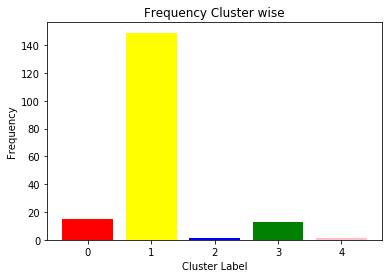

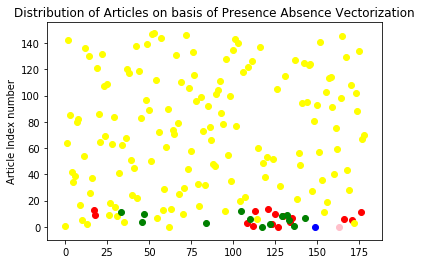

In [ ]:
counts=df.groupby('labels_PresenceAndAbsenceVectorization')[['Article']].count()
print (counts)
plt.bar(counts.index,counts['Article'],color=['red','yellow','blue','green','pink'],align="center")
plt.title("Frequency Cluster wise")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.show()


for group,subset in df.groupby('labels_PresenceAndAbsenceVectorization'):
    if group==0:
        plt.scatter(subset.index,range(len(subset)),c='red',edgecolors='face')
    elif group==1:
        plt.scatter(subset.index,range(len(subset)),c='yellow',edgecolors='face')
    elif group==2:
        plt.scatter(subset.index,range(len(subset)),c='blue',edgecolors='face')
    elif group==3:
        plt.scatter(subset.index,range(len(subset)),c='green',edgecolors='face')
    else:
        plt.scatter(subset.index,range(len(subset)),c='pink',edgecolors='face')
plt.title("Distribution of Articles on basis of Presence Absence Vectorization")
plt.ylabel("Article Index number")        
plt.show()  



                           Article
labels_CountVectorization         
0                               12
1                              125
2                                7
3                               34
4                                1


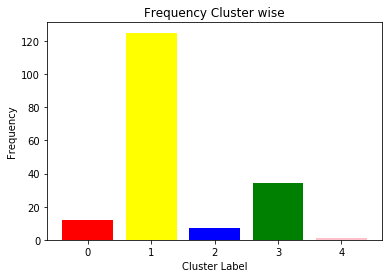

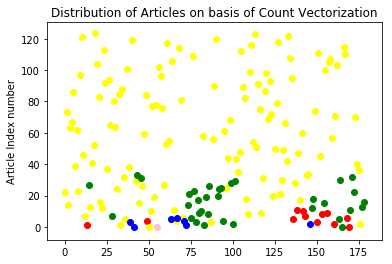

In [ ]:
counts=df.groupby('labels_CountVectorization')[['Article']].count()
print (counts)
plt.bar(counts.index,counts['Article'],color=['red','yellow','blue','green','pink'],align="center")
plt.title("Frequency Cluster wise")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.show()


for group,subset in df.groupby('labels_CountVectorization'):
    if group==0:
        plt.scatter(subset.index,range(len(subset)),c='red',edgecolors='face')
    elif group==1:
        plt.scatter(subset.index,range(len(subset)),c='yellow',edgecolors='face')
    elif group==2:
        plt.scatter(subset.index,range(len(subset)),c='blue',edgecolors='face')
    elif group==3:
        plt.scatter(subset.index,range(len(subset)),c='green',edgecolors='face')
    else:
        plt.scatter(subset.index,range(len(subset)),c='pink',edgecolors='face')
plt.title("Distribution of Articles on basis of Count Vectorization")
plt.ylabel("Article Index number")        
plt.show()  

                           Article
labels_TFIDFVectorization         
0                               34
1                               33
2                               33
3                               43
4                               36


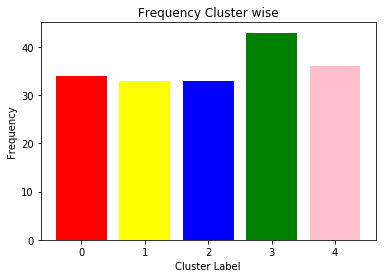

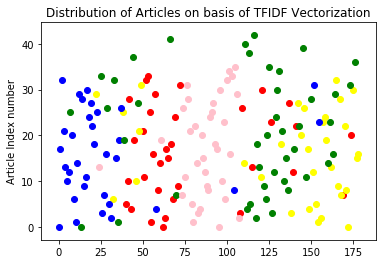

In [ ]:
counts=df.groupby('labels_TFIDFVectorization')[['Article']].count()
print (counts)
plt.bar(counts.index,counts['Article'],color=['red','yellow','blue','green','pink'],align="center")
plt.title("Frequency Cluster wise")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.show()

for group,subset in df.groupby('labels_TFIDFVectorization'):
    if group==0:
        plt.scatter(subset.index,range(len(subset)),c='red',edgecolors='face')
    elif group==1:
        plt.scatter(subset.index,range(len(subset)),c='yellow',edgecolors='face')
    elif group==2:
        plt.scatter(subset.index,range(len(subset)),c='blue',edgecolors='face')
    elif group==3:
        plt.scatter(subset.index,range(len(subset)),c='green',edgecolors='face')
    else:
        plt.scatter(subset.index,range(len(subset)),c='pink',edgecolors='face')
plt.title("Distribution of Articles on basis of TFIDF Vectorization")
plt.ylabel("Article Index number")        
plt.show()  

## Answers to questions 

#1. What does silhoutte score tells us ?

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

#2. Which Alogorithm we chose and why ?

Kmeans was chosen as number of clusters were given.

# 3.Can you provide an appropriate name to a cluster label? If yes, then explain your observations.

See the explanation below:

Let's consider TF_IDF Vectorization and randomy take 3 articles from each label 
Read the first 50 words from the random articles from each label and observe if they are referring to the same news . We had subfolders such as 'business','sports' etc .Now relate if you can provide a name to the cluster.

#4.Which vectorization technique is the best and why?

Best results are provided by TF_IDF .
In others we observe the results are biased towards a particular label but here we get competitive number of articles under each label.